## Clustering

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from pathlib import Path
import sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

repo_root = Path.cwd().resolve().parent   # repo root when notebook is in 'notebooks'
sys.path.append(str(repo_root))

from src.data_modelling import train_model, evaluate_model, computeFeatureOutliers, LinearReg
from src.visualisation import importance_graph

df = pd.read_csv("../data/processed/loans_processed.csv", index_col=False)
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   credit.policy  int.rate  installment  log.annual.inc       dti      fico  \
0            1.0  0.004023     0.879888        0.544762  0.650200  0.104167   
1            1.0  0.003217     0.229916        0.506334  0.476969  0.079167   
2            1.0  0.005171     0.379883        0.404820  0.388184  0.058333   
3            1.0  0.002787     0.158653        0.544762  0.270360  0.083333   
4            1.0  0.005642     0.094378        0.537503  0.499666  0.045833   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           0.312754   0.023898    0.077761        0.000000     0.000000   
1           0.147818   0.027848    0.114478        0.000000     0.000000   
2           0.259495   0.002908    0.038209        0.030303     0.000000   
3           0.144379   0.027885    0.109254        0.030303     0.000000   
4           0.222613   0.003926    0.058955        0.000000     0.076923   

   pub.rec  purpose_all_other  purpose_

In [51]:
data = df.drop('not.fully.paid',axis=1)

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [53]:
kmeans.fit(data)

KMeans(n_clusters=4)

In [54]:
kmeans.cluster_centers_

array([[ 8.14505939e-01,  4.77527547e-03,  3.71363473e-01,
         4.82091150e-01,  4.69841855e-01,  7.67700699e-02,
         2.49334197e-01,  1.42044940e-02,  8.09717221e-02,
         4.42713718e-02,  1.25386365e-02,  1.41015921e-02,
         4.77395901e-15, -2.05391260e-15,  1.00000000e+00,
        -4.71844785e-16,  5.68989300e-16,  2.42861287e-16,
        -9.02056208e-16],
       [ 7.87215787e-01,  4.30421932e-03,  2.47998899e-01,
         4.72281823e-01,  3.69809682e-01,  8.61200486e-02,
         2.37024889e-01,  1.06704302e-02,  5.97265410e-02,
         4.93740494e-02,  1.36950137e-02,  9.43800944e-03,
         1.00000000e+00,  1.94289029e-16,  4.05231404e-15,
        -3.60822483e-16,  3.46944695e-16, -4.44089210e-16,
        -1.24900090e-16],
       [ 8.07562711e-01,  3.98384643e-03,  3.05514491e-01,
         4.92676107e-01,  4.06617909e-01,  8.65702608e-02,
         2.61351459e-01,  1.45895763e-02,  6.52117213e-02,
         4.86822550e-02,  1.17213374e-02,  1.26544365e-02,
    

In [55]:
km = kmeans.labels_
km


array([0, 2, 0, ..., 0, 2, 0], dtype=int32)

In [56]:
df_km = pd.DataFrame(km, columns=['cluster'])
df_km

,cluster
0,0
1,2
2,0
3,0
4,2
...,...
9573,1
9574,1
9575,0
9576,2


In [57]:
df_final =  pd.concat([data, df['not.fully.paid'], df_km], axis=1)
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,not.fully.paid,cluster
0,1.0,0.004023,0.879888,0.544762,0.650200,0.104167,0.312754,0.023898,0.077761,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
1,1.0,0.003217,0.229916,0.506334,0.476969,0.079167,0.147818,0.027848,0.114478,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2
2,1.0,0.005171,0.379883,0.404820,0.388184,0.058333,0.259495,0.002908,0.038209,0.030303,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
3,1.0,0.002787,0.158653,0.544762,0.270360,0.083333,0.144379,0.027885,0.109254,0.030303,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
4,1.0,0.005642,0.094378,0.537503,0.499666,0.045833,0.222613,0.003926,0.058955,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2


In [70]:
df_zero = df_final[df_final['cluster']==0]
df_zero.drop('cluster', axis=1, inplace=True)
df_zero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3957 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               3957 non-null   float64
 1   int.rate                    3957 non-null   float64
 2   installment                 3957 non-null   float64
 3   log.annual.inc              3957 non-null   float64
 4   dti                         3957 non-null   float64
 5   fico                        3957 non-null   float64
 6   days.with.cr.line           3957 non-null   float64
 7   revol.bal                   3957 non-null   float64
 8   revol.util                  3957 non-null   float64
 9   inq.last.6mths              3957 non-null   float64
 10  delinq.2yrs                 3957 non-null   float64
 11  pub.rec                     3957 non-null   float64
 12  purpose_all_other           3957 non-null   float64
 13  purpose_credit_card         3957 non-n

C:\Users\elena\AppData\Local\Temp\ipykernel_50684\636830282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zero.drop('cluster', axis=1, inplace=True)


In [71]:
log_model, feature_names, X_test, y_test = train_model('Logistic Regression', df, 'not.fully.paid')

              precision    recall  f1-score   support

           0       0.91      0.63      0.74      1611
           1       0.25      0.66      0.37       305

    accuracy                           0.64      1916
   macro avg       0.58      0.65      0.55      1916
weighted avg       0.80      0.64      0.68      1916

[[1017  594]
 [ 104  201]]
Accuracy: 0.6357
ROC AUC: 0.7058


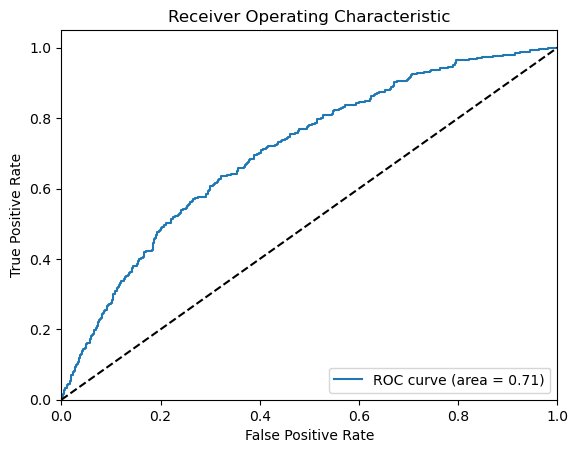

Default Threshold (0.5) Results:
              precision    recall  f1-score   support

           0       0.91      0.63      0.74      1611
           1       0.25      0.66      0.37       305

    accuracy                           0.64      1916
   macro avg       0.58      0.65      0.55      1916
weighted avg       0.80      0.64      0.68      1916

[[1017  594]
 [ 104  201]]
Accuracy: 0.6357
ROC AUC: 0.7058

Lowered Threshold (0.3) Results:
              precision    recall  f1-score   support

           0       0.96      0.08      0.15      1611
           1       0.17      0.98      0.29       305

    accuracy                           0.22      1916
   macro avg       0.57      0.53      0.22      1916
weighted avg       0.84      0.22      0.17      1916

[[ 131 1480]
 [   5  300]]
Accuracy: 0.2249
ROC AUC: 0.7058


In [72]:
accuracy, roc_auc, class_report, conf_matrix = evaluate_model(log_model, X_test, y_test)
print("Default Threshold (0.5) Results:")
print(class_report)
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Lower the decision threshold to 0.3 to increase recall for defaults
y_pred_proba = log_model.predict_proba(X_test)[:, 1]
threshold = 0.3
y_pred_new = (y_pred_proba >= threshold).astype(int)

print(f"\nLowered Threshold ({threshold}) Results:")
print(classification_report(y_test, y_pred_new))
print(confusion_matrix(y_test, y_pred_new))
print(f"Accuracy: {accuracy_score(y_test, y_pred_new):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")  # ROC AUC unchanged